# Run Dates Analysis
Try to install dates software

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt

import socket
import os as os
import sys as sys
import multiprocessing as mp
from time import time

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
### Make sure to have the font installed (it is on cluster for Harald)
rcParams['font.sans-serif'] = ['Arial']

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/"  # The Path on Midway Cluster
else:
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
sys.path.append("/n/groups/reich/hringbauer/git/DATES/src/bin")
# Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")
print(sys.version)

compute-e-16-230.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer
CPU Count: 28
3.7.4 (default, Sep 11 2019, 11:24:51) 
[GCC 6.2.0]


# Install
For install, do a git clone from Priyas git site.
Here, it was copied into my git folder:

git clone https://github.com/priyamoorjani/DATES 
(only used for example, actually use Nick's installation hehe)

### Actual Installation
Change flags as described, for this figure out 
the loaded library paths in $LD_LIBRARY_PATH 
after a module load

# Run DATES

### Modify the code here

In [9]:
def dates_run(output_folder="", 
              par_folder = "./parfiles/", 
              s1="", s2="", targets=[""],
              input_files = "./",
              input_ind_suff = "",
              path_bin = "dates"):
    """Run DATES for targets"""
    ### Create the parfile
    parfile_path = os.path.join(par_folder, "par.dates")
    admix_path = os.path.join(par_folder,"par.admix")
    
    with open(parfile_path, 'w') as f:
        f.write("%s\n" % f"indivname: {input_files+input_ind_suff}.ind")
        f.write("%s\n" % f"snpname: {input_files}.snp")
        f.write("%s\n" % f"genotypename: {input_files}.geno")
        
        f.write("%s\n" % f"admixlist: {admix_path}")
        
        f.write("%s\n" % "binsize: 0.001")
        f.write("%s\n" % "maxdis: 1.0")
        f.write("%s\n" % "chithresh: 0.0")
        f.write("%s\n" % "mincount: 1")
        f.write("%s\n" % "zdipcorrmode: YES")
        f.write("%s\n" % "qbin: 10")
        f.write("%s\n" % "runfit: YES")
        f.write("%s\n" % "afffit: YES")
        f.write("%s\n" % "lovalfit: 0.45")
                
    ### Write admix pops:       
    with open(admix_path, 'w') as f:
        for t in targets:
            o_path = ".".join([t,s1,s2])
            line = " ".join([s1,s2,t,o_path]) + "\n"
            f.write(line)
            
    ### Do the run
    start = time()
    %cd $output_folder
    !$path_bin -p $parfile_path
    end = time()
    print("Runtime: %2f" % (end - start))
    return 0

def plot_dates(load_folder, xlim=[0,20], ylim=[],
               t="target", s1="French", s2="Yoruba",
               s=20, alpha=0.5, figsize=(6,6),
               savepath=""):
    """Plot DATES analysis saved at load_folder"""
    
    load_folder = os.path.join(load_folder, ".".join([t,s1,s2]))
    load_path = os.path.join(load_folder, f"{t}.fit")

    df = pd.read_csv(load_path, sep='\s+', header=None, skiprows=1)
    df.columns = ["morgan", "val", "fit", "diff"]
    
    val, se = pd.read_csv(os.path.join(load_folder, f"{t}.jout"), 
                          sep="\s+", header=None).values[0]
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.scatter(df["morgan"], df["val"], ec="k", alpha=alpha, s=s)
    ax.plot(df["morgan"], df["fit"], color="red")
    ax.set_xlabel("Map distance [centimorgan]")
    ax.set_ylabel("Weighted covariance")
    ax.set_xlim(xlim)
    
    if len(ylim)>0:
        ax.set_ylim(ylim)
        
    ax.axhline(0, c="gray", zorder=0)
    
    label=f"{val:.2f}$\pm${se:.2f} generations"
    ax.text(0.99, 0.99, label, ha="right", va="top", 
            transform = ax.transAxes, fontsize=14)
    
    label=f"{s1}-{s2}"
    ax.text(0.99, 0.01, label, ha="right", va="bottom", 
            transform = ax.transAxes, fontsize=14)
    
    if len(savepath) > 0:
        plt.savefig(savepath, bbox_inches = 'tight', 
                    pad_inches = 0, dpi=600)
        print(f"Saved to: {savepath}")
        #ax.ax.hline(0)
    plt.show()

### Testrun with test data
Takes about 15 sec

In [ ]:
dates_run(output_folder="/n/groups/reich/hringbauer/git/punic_aDNA/output/dates",
          par_folder = "/n/groups/reich/hringbauer/git/punic_aDNA/parfiles/dates",
          s1='French', s2='Yoruba',
          targets=['Simulation', 'Simulation.1'],
          input_files='/n/groups/reich/hringbauer/git/DATES/test_hr/family_packed',
          input_ind_suff='',
          path_bin='dates')

### Analyze Punic Admixture

In [5]:
dates_run(output_folder="/n/groups/reich/hringbauer/git/punic_aDNA/output/dates",
          par_folder = "/n/groups/reich/hringbauer/git/punic_aDNA/parfiles/dates",
          s1='Tunisia_N', s2='Italy_Sicily_IA_Polizzello',  #PunicAfrican
          targets=['PunicCline'],
          input_files='/n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/combined/punic.v46.3',
          input_ind_suff='_punic_clst',
          path_bin='dates')

/n/groups/reich/hringbauer/git/punic_aDNA/output/dates

## DATES.  Version 753

parameter file: /n/groups/reich/hringbauer/git/punic_aDNA/parfiles/dates/par.dates
indivname: /n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/combined/punic.v46.3_punic_clst.ind
snpname: /n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/combined/punic.v46.3.snp
genotypename: /n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/combined/punic.v46.3.geno
admixlist: /n/groups/reich/hringbauer/git/punic_aDNA/parfiles/dates/par.admix
binsize: 0.001
maxdis: 1.0
chithresh: 0.0
mincount: 1
zdipcorrmode: YES
qbin: 10
runfit: YES
afffit: YES
lovalfit: 0.45

seed: 1233849505
genotypename:  /n/groups/reich/hringbauer/git/punic_aDNA/eigenstrat/combined/punic.v46.3.geno
packed geno read OK
end of inpack
valid snps: 1135618
copy param code: 0
calling dowork:  Tunisia_N Italy_Sicily_IA_Polizzello PunicCline
chithresh:     0.000
output tables: PunicCline.out
mesh used :: qbin: 10  numqbins: 1403930
number admixed: 9

0

Saved to: /home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/punafr_polizello.png


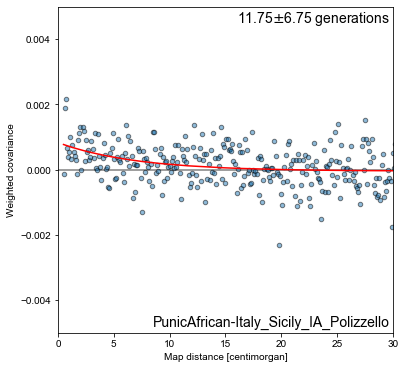

In [18]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="PunicAfrican", s2="Italy_Sicily_IA_Polizzello", 
           xlim=[0,30],  ylim=[-0.005, 0.005],
           savepath="/home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/punafr_polizello.png")

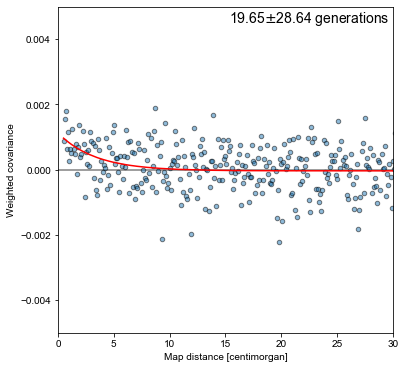

In [189]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="PunicAfrican", s2="Greece_BA_Mycenaean", 
           xlim=[0,30], ylim=[-0.005, 0.005])

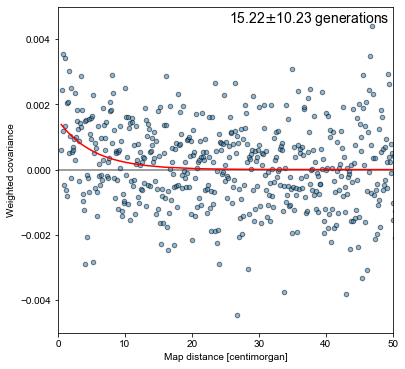

In [186]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="Nigeria_IA", s2="Italy_Sicily_IA_Polizzello", 
           xlim=[0,50], ylim=[-0.005, 0.005])

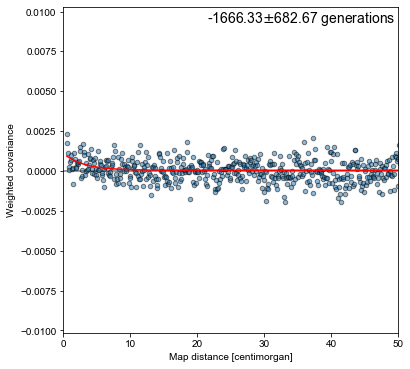

In [173]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="Algeria_IA", s2="Italy_Sicily_IA_Polizzello", xlim=[0,50])

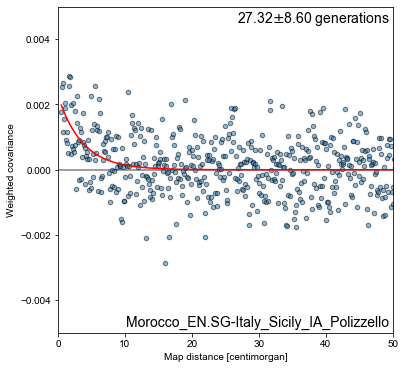

In [15]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="Morocco_EN.SG", s2="Italy_Sicily_IA_Polizzello", xlim=[0,50],
            ylim=[-0.005, 0.005])

Saved to: /home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/iberom_polizello.png


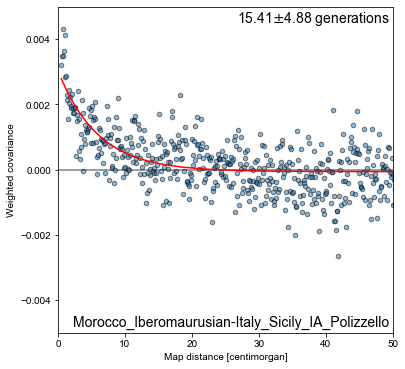

In [16]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="Morocco_Iberomaurusian", s2="Italy_Sicily_IA_Polizzello", xlim=[0,50],
            ylim=[-0.005, 0.005],
           savepath="/home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/iberom_polizello.png")

Saved to: /home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/tunisiaN_polizello.png


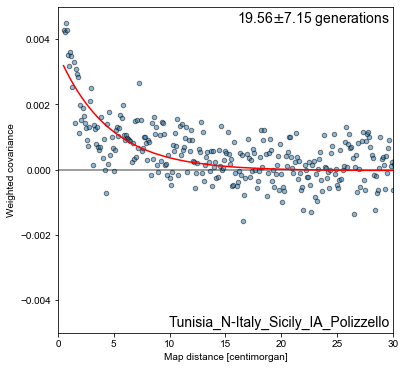

In [17]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="PunicCline", s1="Tunisia_N", s2="Italy_Sicily_IA_Polizzello", 
           savepath="/home/hr97/hringbauer/git/punic_aDNA/figures/dates.v46/tunisiaN_polizello.png",
           xlim=[0,30], ylim=[-0.005, 0.005])

# Plot the results

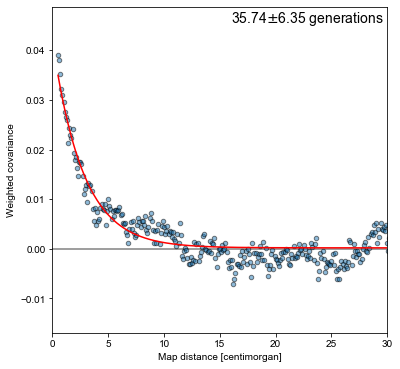

In [161]:
plot_dates("/home/hr97/hringbauer/git/punic_aDNA/output/dates", 
           t="Simulation", s1="French", s2="Yoruba", xlim=[0,30])

# Area 51

In [ ]:
def dates_run0(leftpops, rightpops, output_file, 
              input_folder = "./eigenstrat/combined/", 
              input_file="punic.v44",
              par_file_folder = "./parfiles/", 
              input_ind_suff="_mod1", 
              output_folder ="./output/qpAdm/", 
              path_bin_qpAdm = "/n/groups/reich/hringbauer/o2bin/qpAdm",
              all_snps=False):
    """Run qpAdm. Write temporary parfile and run the analysis
    leftpops: List of left populations
    rightpops: List of right populations
    input_folder: Where to find the input files
    par_file_folder: Folder of the parameterfile
    input_file: The name of the input file
    input_ind_suff: Suffix of .ind file. To allow modified populations
    input_ind: name of the input .ind file. If given - write over default"""
    #print(os.getcwd())
    parfile_path = par_file_folder + "parfile." + output_file
    left_path = par_file_folder + "left." + output_file
    right_path = par_file_folder + "right." + output_file
    
    ### Create the parfile:
    with open(parfile_path, 'w') as f:
        f.write("%s\n" % ("DIR: " + input_folder))
        f.write("%s\n" % ("S1: " + input_file))
        
        indline = "indivname: DIR/S1" + input_ind_suff + ".ind"
        f.write("%s\n" % indline)
        f.write("%s\n" % "snpname: DIR/S1.snp")
        f.write("%s\n" % "genotypename: DIR/S1.geno")
        f.write("%s\n" % ("popleft: " + left_path))
        f.write("%s\n" % ("popright: " + right_path))
        f.write("%s\n" % "details: YES")   
        if all_snps==True:
            f.write("%s\n" % "allsnps: YES")
    
    ### Write leftpops rightpops:       
    with open(left_path, 'w') as f:
        f.write("\n".join(leftpops))
        
    with open(right_path, 'w') as f:
        f.write("\n".join(rightpops))
    
    output_path = output_folder + output_file + ".log"
    command = f"{path_bin_qpAdm} -p {parfile_path} > {output_path}"
    #print(f"Running command: \n{command}")
    
    ### Run qpAdm
    start = time()
    #!$path_bin_qpAdm -p $parfile_path > $output_path
    os.system(command)
    end = time()
    
    print("Runtime: %2f" % (end - start))
    return 0

In [115]:
val

35.738